# Cartoon

In [19]:
(ns opencv4.cartoon
(:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

nil

### simple canny

In [20]:
(def source 
  (-> "resources/chapter03/johan.jpg"
  (imread IMREAD_REDUCED_COLOR_8)))
;(-> source u/>>>)

#'opencv4.cartoon/source

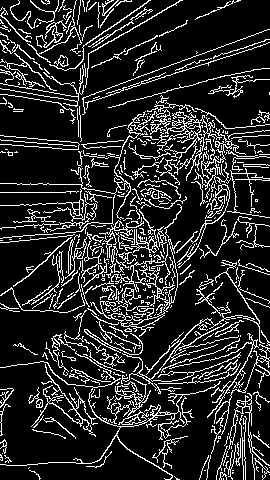

In [23]:
(def c
  (->
source 
clone
(cvt-color! COLOR_BGR2GRAY)
(canny! 10.0 90.0 3 false)))

(u/>>> c)

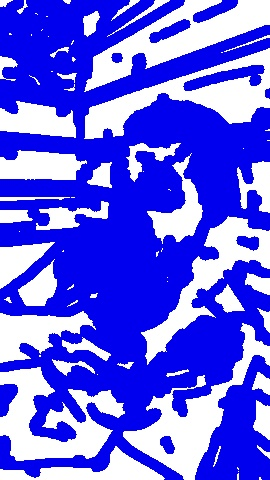

In [25]:
(def c
  (->
source 
clone
(cvt-color! COLOR_BGR2GRAY)
;(gaussian-blur! (new-size 13 13) 1 1)
;(median-blur! 13)

(canny! 70.0 90.0 3 false)
(bilateral-filter! 10 120 30))
  )

;(u/>>> c)

(def colored (u/mat-from source))
(set-to colored rgb/blue-2)

(def target (u/mat-from source))
(set-to target rgb/white)

(copy-to colored target c)
(u/>>> target)

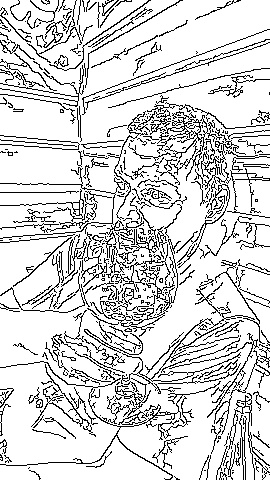

In [28]:
(->
source 
clone
(cvt-color! COLOR_BGR2GRAY)
;(gaussian-blur! (new-size 3 3) 1 1)
;(median-blur! 3)
(canny! 10.0 90.0 3 false)
(bitwise-not!)
(u/>>>))

### sepia effect 

In [29]:
(defn update-channel! [ mat fnc chan]
  (let [ channels (new-arraylist)]
    (split mat channels)
    (let [
      old-ch (nth channels chan)
      new-ch
    (u/bytes-to-mat!
      (new-mat (.height mat) (.width mat) (.type old-ch) )
       (byte-array (map fnc (u/mat-to-bytes old-ch) )))]
     (.set channels chan new-ch)
     (merge channels mat)
     mat)))

(defn cartoon! [mat thresh-1 thresh-2 inverse?]
  (-> mat
   (median-blur! 1)
   (cvt-color! COLOR_BGR2GRAY)
   (update-channel! (fn[x] (cond (< x thresh-1) 0 (< x thresh-2) 100 :else 255)) 0)  
   ((fn[x] (if inverse? (bitwise-not! x) x)))
   (cvt-color! COLOR_GRAY2BGR)))

#'opencv4.cartoon/cartoon!

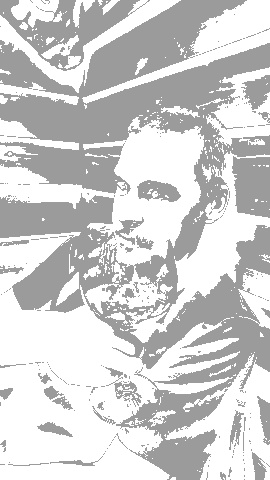

In [30]:
(-> 
  "resources/chapter03/johan.jpg"
 (imread IMREAD_REDUCED_COLOR_8)
 (median-blur! 1)
 (cvt-color! COLOR_BGR2GRAY)
 (update-channel! (fn[x] (cond (< x 70) 0 (< x 180) 100 :else 255)) 0)  
 (bitwise-not!)
 (cvt-color! COLOR_GRAY2BGR)
 (u/>>>))

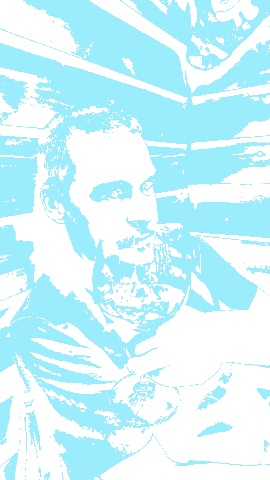

In [31]:
(->
"resources/chapter03/johan.jpg"
(imread IMREAD_REDUCED_COLOR_8)
(cartoon! 70 180 false)

(cvt-color! COLOR_BGR2HSV) 
(update-channel! (fn [x] 250) 1) 
(update-channel! (fn [x] 5) 0) 
(cvt-color! COLOR_HSV2BGR)
(bitwise-not!)
(flip! 1)
  
(u/>>>))

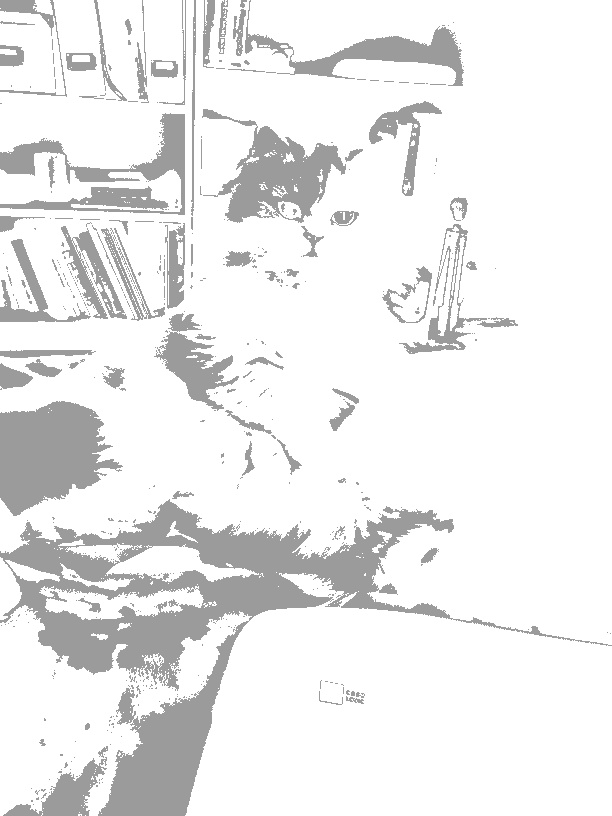

In [32]:
(->
"resources/chapter03/emilie1.jpg"
(imread IMREAD_REDUCED_COLOR_4)

(median-blur! 1)
(cartoon! 70 180 true)

;(cvt-color! COLOR_BGR2HSV)
;(update-channel! (fn [x] (+ x 30)) 2) 
;(update-channel! (fn [x] 255) 1) 
;(update-channel! (fn [x] 10) 0) 
;(cvt-color! COLOR_HSV2BGR)
;(bitwise-not!)

  
(u/>>>))

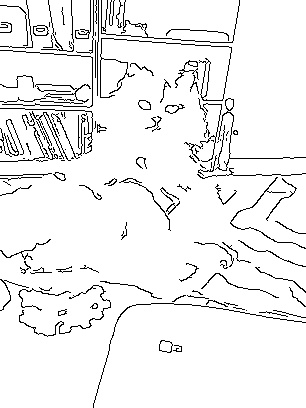

In [33]:
(->
"resources/chapter03/emilie1.jpg"
(imread IMREAD_REDUCED_COLOR_8)
(cvt-color! COLOR_BGR2GRAY)
;(gaussian-blur! (new-size 3 3) 1 1)
(median-blur! 3)
(canny! 70.0 180.0 3 false)
(bitwise-not!)
(u/>>>))

In [34]:
(defn cartoon0 [mat]
  (-> mat
 (cvt-color! COLOR_BGR2GRAY)
 (gaussian-blur! (new-size 1 1) 1 1)
 (median-blur! 1)
 (canny! 100.0 220.0 3 true)
 (bitwise-not!)))

#'opencv4.cartoon/cartoon0

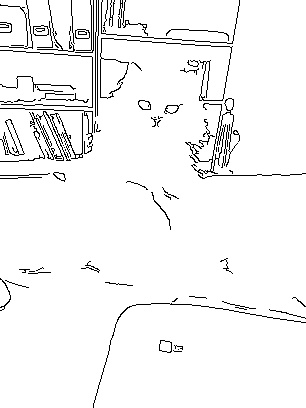

In [35]:
(->
"resources/chapter03/emilie1.jpg"
(imread IMREAD_REDUCED_COLOR_8)
cartoon0
u/>>>)

In [36]:
(defn cartoon-0!
  [buffer]
  (-> buffer
    (cvt-color! COLOR_RGB2GRAY)
    (bilateral-filter! 10 250 30)
    (median-blur! 7)
    (adaptive-threshold! 255 ADAPTIVE_THRESH_MEAN_C THRESH_BINARY 9 3)
    (cvt-color! COLOR_GRAY2BGR)))

#'opencv4.cartoon/cartoon-0!

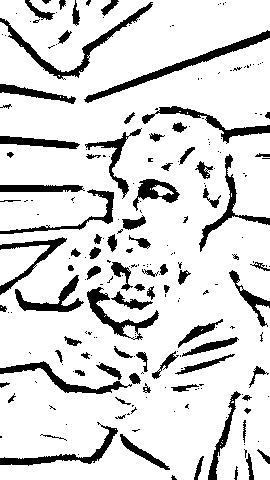

In [37]:
(-> "resources/chapter03/johan.jpg"
(imread IMREAD_REDUCED_COLOR_8)
cartoon-0!
u/>>>)

In [38]:
(defn cartoon-1!
  [buffer]
  (-> buffer
    (cvt-color! COLOR_RGB2GRAY)
    (bilateral-filter! 9 9 7)
    (median-blur! 7)
    (adaptive-threshold! 255 ADAPTIVE_THRESH_MEAN_C THRESH_BINARY 9 3)
    (cvt-color! COLOR_GRAY2BGR)))

#'opencv4.cartoon/cartoon-1!

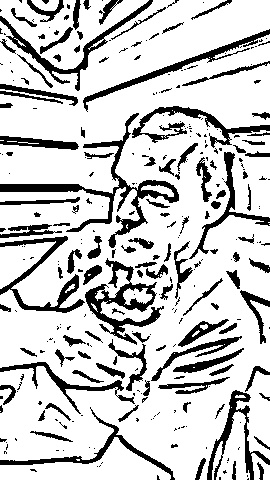

In [39]:
(-> "resources/chapter03/johan.jpg"
(imread IMREAD_REDUCED_COLOR_8)
cartoon-1!
u/>>>)

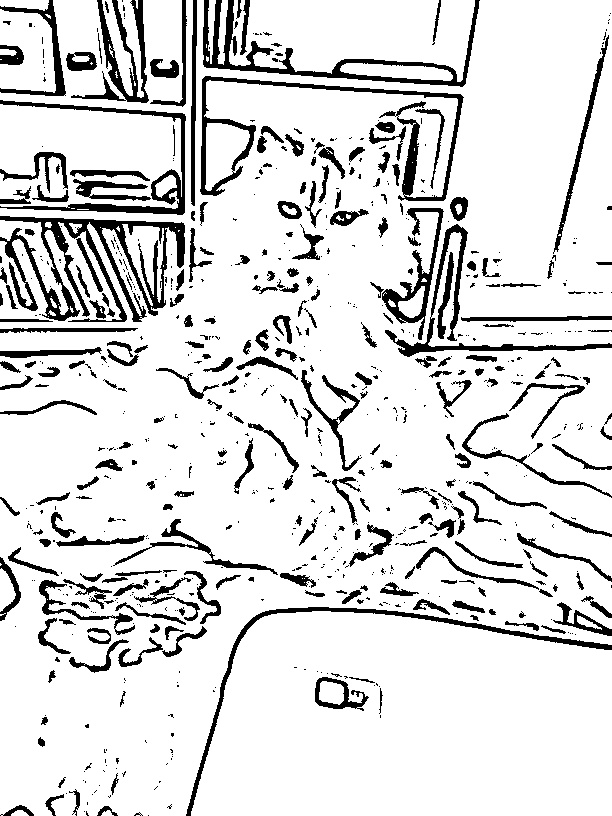

In [42]:
(-> "resources/chapter03/emilie1.jpg" ;"resources/matching/rose_flower.jpg"
(imread IMREAD_REDUCED_COLOR_4)
cartoon-1!
(u/>>>))    

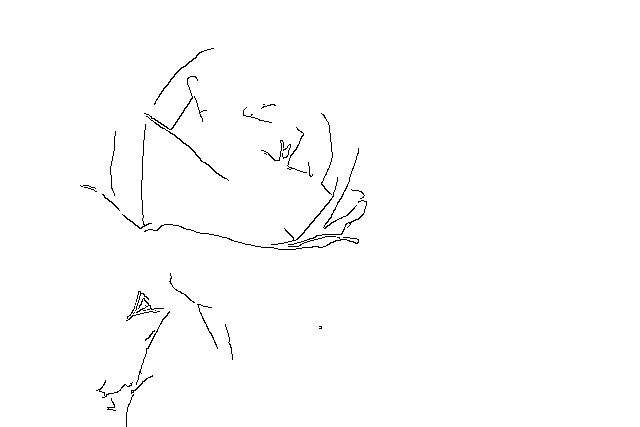

In [45]:
(-> "resources/matching/rose_flower.jpg"
(imread IMREAD_REDUCED_COLOR_2)
cartoon0
(u/>>>))    